# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Merri Putri Cristina Sani Panggabean
- **Email:** merypanggabean219@gmail.com
- **ID Dicoding:** MC404D5X0047

## Menentukan Pertanyaan Bisnis

- Apakah lebih banyak pengguna berlangganan (registered) dibandingkan pengguna kasual (casual)?
- Bagaimana cuaca (weather) mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
# mememuat tools yang akan digunakan.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

## Data Wrangling

memuat tabel **day.csv** dan **hour.scv**.

### Gathering Data

- Memuat tabel **day.csv**

In [22]:
# memanggil dataset pada setiap tabel menggunakan *read.csv*
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

menampilkan data teratas pada tabel **day_df** dan **hour_df**.

In [154]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [155]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- saya menggunakan perintah **pd.read_csv** untuk file **day.csv** untuk membaca file, apakah berada didirektori yang telah ditentukan. menggunakan perintah **df.head()** untuk menampilkan tabel teratas pada dataset **day_df**.
- begitu juga pada file **hour.csv**, saya menggunakan **pd.read.csv** untuk membaca file **hour.csv** serta menggunakan perintah **df.head()** untuk menampilkan tabel teratas pada dataset **hour_df**.

### Assessing Data

- menilai data **day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [158]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


menilai data **hour_df**.

In [159]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [160]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [161]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**insight**
1. tabel **day_df** dan **hour_df**
  - pada coloumn **dteday** memiliki dtype **object**, maka saya akan menggantikannya dengan dtype **datetime**. akan dilakukan pada *Cleaning data*.
  - menghapus kolom **instant** karena hanya berupa ID yang tidak perlu di analisis dan menghapus **workingday** karena sudah termasuk ke dalam coloumn **weekday**.
  - tidak ada missing value, Inaccurate value dan duplikat data.
  - pada coloumn **season, yr, mnth, holiday, weekday,weathersit** memiliki dtype **int**, maka saya akan konversi nilai numerik menjadi kategori yang akan dilakukan di *Cleaning Data*.
  - melakukan konversi isi pada dataset kolom yang berupa type **category**, agar mudah dipahami oleh pengguna.

### Cleaning Data

membersihkan dataset pada tabel **day_df**

1. mengubah dtype **object** menjadi **datetime** pada coloumn **dteday**.

In [6]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

menghapus coloumn **instant** dan **workingday**.

In [23]:
day_df.drop(columns=['instant'], inplace=True)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [24]:
day_df.drop(columns=['workingday'], inplace=True)

In [25]:
#mengkonversi isi nilai numerik menjadi kategory pada coloumn season.
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}).astype('category')

mengkonversi coloumn **weathersit, yr, mnth, weekday,holiday**  menjadi **category** serta mengubah angka sesuai ketentuan kolom tersebut.

In [26]:
day_df['yr'] = day_df['yr'].map({0: '2011', 1: '2012'})

In [27]:
day_df['mnth'] = day_df['mnth'].map({i: month for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 1)})

In [28]:
day_df['holiday'] = day_df['holiday'].map({0: 'No', 1: 'Yes'})

In [29]:
day_df['weekday'] = day_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [30]:
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}).astype('category')

In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sunday,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


mengubah coloum **temp, atemp, hum,windspeed** kedalam skala data ke satuan yang lebih umum.

In [31]:
day_df["temp"] = day_df["temp"] * 41
day_df["atemp"] = day_df["atemp"] * 50
day_df["hum"] = day_df["hum"] * 100
day_df["windspeed"] = day_df["windspeed"] * 67
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,Jan,No,Sunday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,Jan,No,Monday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,Jan,No,Tuesday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,Jan,No,Wednesday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


membersihkan tabel **hour_df**

mengubah dtype **object** menjadi **datetime** pada coloumn **dteday**.

In [18]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

menghapus coloumn **instant** dan **workingday** pada tabel **hour_df.**

In [19]:
hour_df.drop(columns=['instant'], inplace=True)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [32]:
hour_df.drop(columns=['workingday'], inplace=True)

In [20]:
#mengubah/mengkonversi isi dataset pada coloumn **season**.
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}).astype('category')

In [21]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


mengkonversi isi dataset pada colomn **yr,mnth,hr,weekday,weathersit dan holiday** agar mudah dipahami pengguna.

In [33]:
hour_df['yr'] = hour_df['yr'].map({0: '2011', 1: '2012'})

In [34]:
hour_df['mnth'] = hour_df['mnth'].map({i: month for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 1)})

In [35]:
hour_df['time_of_day'] = pd.cut(hour_df['hr'], bins=[0, 4, 8, 12, 16, 20, 24],
                           labels=['Midnight', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'],
                           right=False)

In [36]:
hour_df['holiday'] = hour_df['holiday'].map({0: 'No', 1: 'Yes'})

In [38]:
hour_df['weekday'] = hour_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}).astype('category')

In [39]:
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}).astype('category')

In [40]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_of_day
0,1,2011-01-01,1,2011,Jan,0,No,Saturday,Clear,0.24,0.2879,0.81,0.0,3,13,16,Midnight
1,2,2011-01-01,1,2011,Jan,1,No,Saturday,Clear,0.22,0.2727,0.80,0.0,8,32,40,Midnight
2,3,2011-01-01,1,2011,Jan,2,No,Saturday,Clear,0.22,0.2727,0.80,0.0,5,27,32,Midnight
3,4,2011-01-01,1,2011,Jan,3,No,Saturday,Clear,0.24,0.2879,0.75,0.0,3,10,13,Midnight
4,5,2011-01-01,1,2011,Jan,4,No,Saturday,Clear,0.24,0.2879,0.75,0.0,0,1,1,Early Morning


mengubah coloum **temp, atemp, hum,windspeed** kedalam skala data ke satuan yang lebih umum.

In [41]:
hour_df["temp"] = hour_df["temp"] * 41
hour_df["atemp"] = hour_df["atemp"] * 50
hour_df["hum"] = hour_df["hum"] * 100
hour_df["windspeed"] = hour_df["windspeed"] * 67

In [42]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_of_day
0,1,2011-01-01,1,2011,Jan,0,No,Saturday,Clear,9.84,14.395,81.0,0.0,3,13,16,Midnight
1,2,2011-01-01,1,2011,Jan,1,No,Saturday,Clear,9.02,13.635,80.0,0.0,8,32,40,Midnight
2,3,2011-01-01,1,2011,Jan,2,No,Saturday,Clear,9.02,13.635,80.0,0.0,5,27,32,Midnight
3,4,2011-01-01,1,2011,Jan,3,No,Saturday,Clear,9.84,14.395,75.0,0.0,3,10,13,Midnight
4,5,2011-01-01,1,2011,Jan,4,No,Saturday,Clear,9.84,14.395,75.0,0.0,0,1,1,Early Morning


**Insight:**
- kolom instant dan workingday telah dihapus.
- telah mengisi dataset yang mudah dipahami.
- mengganti typedata int pada season,yr,mnth,holiday,weekday dan weathersit - - - menjadi typedate category.
- mengubah typedate pada dteday menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore tabel_df dan hour_df

Explore Tabel **day_df**

In [33]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
550,551,2012-07-04,Fall,2012,Jul,Yes,Wednesday,No,Clear,32.355847,36.61685,53.8750,9.041650,2562,4841,7403
657,658,2012-10-19,Winter,2012,Oct,No,Friday,Yes,Mist,23.096653,26.89480,81.5000,9.041918,753,4671,5424
588,589,2012-08-11,Fall,2012,Aug,No,Saturday,No,Mist,28.392500,31.91335,73.2917,13.834093,2247,4052,6299
377,378,2012-01-13,Spring,2012,Jan,No,Friday,Yes,Clear,11.240847,12.46810,50.7500,25.333236,174,3040,3214
157,158,2011-06-07,Summer,2011,Jun,No,Tuesday,Yes,Clear,29.007500,32.79750,59.7917,12.583136,763,4070,4833


In [34]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jan,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [47]:
# melihat dataset penyewaan sepeda dari musim.
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False).head(10)

<ipython-input-47-c47843c657c9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False).head(10)


,cnt
season,
Fall,188
Summer,182
Spring,179
Winter,176


In [46]:
#melihat pengguna memakai sepeda berdasarkan hari
day_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False).head(10)

,cnt
weekday,
Friday,104
Monday,104
Sunday,104
Tuesday,104
Thursday,103
Wednesday,103
Saturday,102


explore tabel **hour_df**

In [38]:
hour_df.sample(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_of_day
4959,2011-07-30,Fall,2011,Jul,13,No,Saturday,No,Clear,36.08,37.880,29.0,0.0000,125,183,308,Afternoon
4292,2011-07-02,Fall,2011,Jul,18,No,Saturday,No,Clear,33.62,35.605,30.0,19.0012,193,190,383,Evening
6737,2011-10-13,Winter,2011,Oct,7,No,Thursday,Yes,Light Rain/Snow,22.14,25.760,100.0,8.9981,5,76,81,Early Morning
2983,2011-05-09,Summer,2011,May,5,No,Monday,Yes,Clear,17.22,21.210,77.0,11.0014,0,23,23,Early Morning
11460,2012-04-27,Summer,2012,Apr,17,No,Friday,Yes,Clear,22.14,25.760,24.0,26.0027,89,613,702,Evening


In [39]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_of_day
count,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,Fall,2012,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evening
freq,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2916
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000,NaN
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000,NaN
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,NaN


<Axes: >

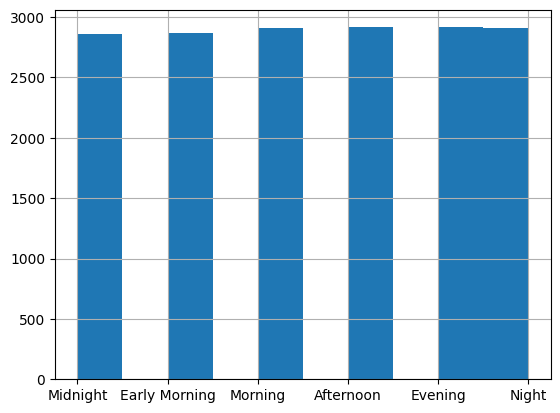

In [50]:
hour_df.time_of_day.hist()

In [43]:
#melihat penyewaan berdasarkan waktu (time_of_day)
hour_df.groupby("time_of_day")["cnt"].mean()

<ipython-input-43-ba19d63a724e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby("time_of_day")["cnt"].mean()


,cnt
time_of_day,
Midnight,30.684836
Early Morning,79.550593
Morning,240.033012
Afternoon,249.788679
Evening,377.629973
Night,154.377747


In [44]:
#melihat penyewaan sepeda berdasarkan tahun.
hour_df.groupby("yr")["cnt"].mean()

,cnt
yr,
2011,143.794448
2012,234.666361


penyewa sepeda tertinggi dalam setiap bulannya ialah **Aug, jun dan sep** sedangkan penyewa sepeda terendah setiap bulannya ialah **dec,mar,nov**

In [51]:
day_hour_df.groupby(by="weekday_x").cnt_y.nunique().sort_values(ascending=False).head(10)

,cnt_y
weekday_x,
Wednesday,616
Saturday,609
Thursday,606
Tuesday,598
Monday,595
Friday,584
Sunday,571


# menggabungkan semua data

menghubungkan semua data.

In [52]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,time_of_day
0,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Mist,14.110847,...,No,Clear,9.84,14.395,81.0,0.0,3,13,16,Midnight
1,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Mist,14.110847,...,No,Clear,9.02,13.635,80.0,0.0,8,32,40,Midnight
2,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Mist,14.110847,...,No,Clear,9.02,13.635,80.0,0.0,5,27,32,Midnight
3,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Mist,14.110847,...,No,Clear,9.84,14.395,75.0,0.0,3,10,13,Midnight
4,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Mist,14.110847,...,No,Clear,9.84,14.395,75.0,0.0,0,1,1,Early Morning


**Insight:**
- pengguna sepeda berlanggan (**registered**) lebih tinggi dibandingkan pengguna sepeda yang tidak berlangganan (**casual**) pada tahun 2012.
- penyewa sepeda makin meningkat tiap tahun dari 2011-2012. jika dilihat, pengguna registered yang lebih banyak mencapai 995.851 dibandingkan pengguna casual hanya mencapai 247.252.
- tahun **2012** menunjukan peningkatan jumlah penyewaan sepeda dibandingkan tahun **2011**.
- pada Sore (Evening) adalah waktu tersibuk untuk penyewaan sepeda,penyewaan paling sedikit terjadi pada tengah malam (Midnight) dan  Waktu pagi (Morning) dan siang (Afternoon) juga cukup sibuk, tapi tidak setinggi sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah lebih banyak pengguna berlangganan (registered) dibandingkan pengguna kasual (casual)?

In [59]:
all_df.sample(5)

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,instant,hr,time_of_day
4677,2011-06-18,2,2011,Jun,No,Saturday,Clear,27.06,30.305,78.0,6.0032,28,103,131,3947.0,8.0,Morning
15169,2012-08-29,3,2012,Aug,No,Wednesday,Clear,28.70,32.575,54.0,12.9980,120,523,643,14439.0,19.0,Evening
13047,2012-06-02,2,2012,Jun,No,Saturday,Clear,22.96,26.515,60.0,16.9979,89,243,332,12317.0,9.0,Morning
12118,2012-04-24,2,2012,Apr,No,Tuesday,Clear,20.50,24.240,23.0,12.9980,54,308,362,11388.0,16.0,Evening
16136,2012-10-09,4,2012,Oct,No,Tuesday,Light Rain/Snow,14.76,16.665,87.0,16.9979,2,5,7,15406.0,2.0,Midnight


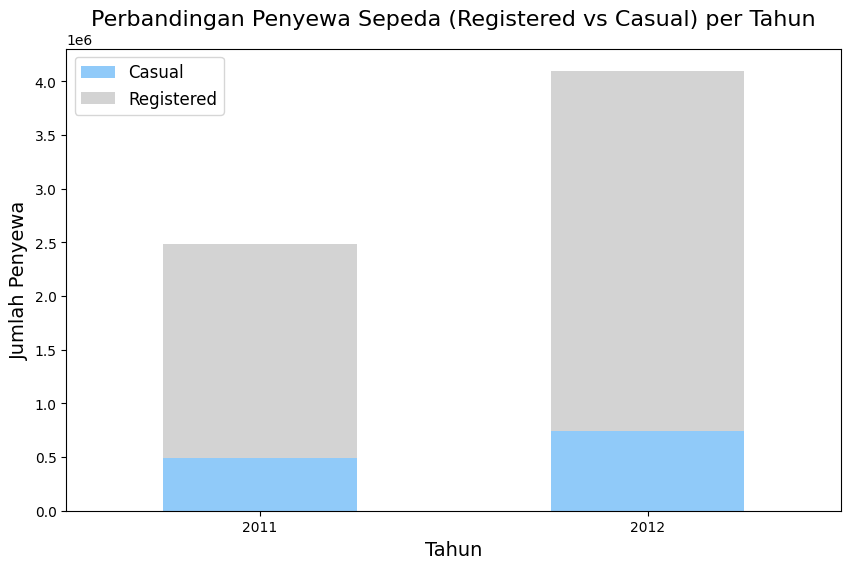

In [77]:

# Mengelompokkan data berdasarkan tahun
df_yearly = all_df.groupby("yr")[["casual", "registered"]].sum().reset_index()

# Membuat bar chart untuk membandingkan jumlah penyewa registered vs casual per tahun
fig, ax = plt.subplots(figsize=(10, 6))
df_yearly.set_index("yr").plot(kind="bar", stacked=True, ax=ax, color=["#90CAF9", "#D3D3D3"])
ax.set_xlabel("Tahun", fontsize=14)
ax.set_ylabel("Jumlah Penyewa", fontsize=14)
ax.set_title("Perbandingan Penyewa Sepeda (Registered vs Casual) per Tahun", fontsize=16)
ax.legend(["Casual", "Registered"], fontsize=12)
plt.xticks(rotation=0)
plt.show()

- berdasarkan bulan (**mnth**)

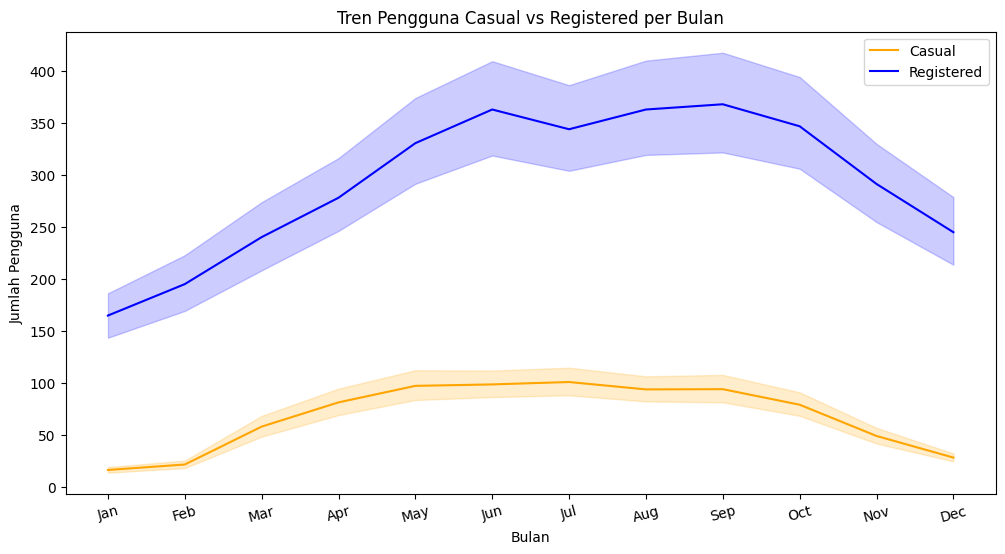

In [65]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_df, x="mnth", y="casual", label="Casual", color="orange")
sns.lineplot(data=all_df, x="mnth", y="registered", label="Registered", color="blue")
plt.xticks(rotation=15)
plt.title("Tren Pengguna Casual vs Registered per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna")
plt.legend()
plt.show()


### Pertanyaan 2: Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?

<ipython-input-74-f00c01c7d089>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


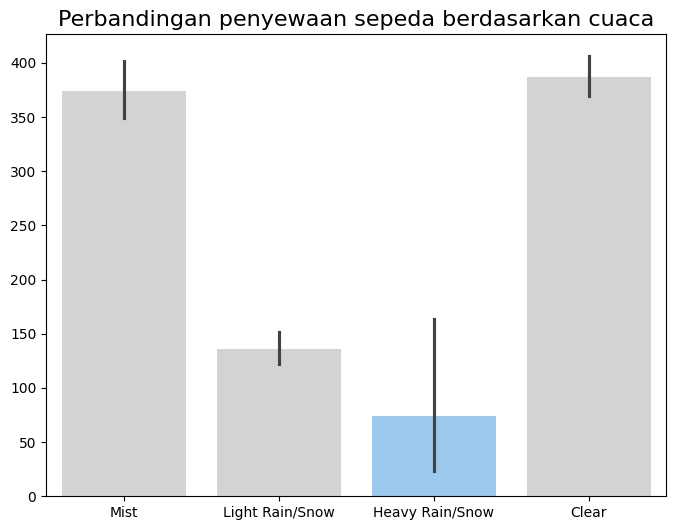

In [74]:
# mengatur warna
colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(8, 6))

# Buat barplot untuk y="cnt" dan x="weathersit"
sns.barplot(
        y="cnt",
        x="weathersit",
        data=all_df.sort_values(by="weathersit", ascending=False),
        palette=colors,
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Perbandingan penyewaan sepeda berdasarkan cuaca", loc="center", fontsize=16)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# menampilkan plot
plt.show()

**Insight:**
- pengguna registered paling banyak menggunakan penyewaan sepeda dibandingkan pengguna casual setiap bulannya.
- tahun 2011-2012 yang paling banyak menggunakan penyewaan sepeda ialah pengguna registered dan terendah adalah pengguna casual.
- penyewaan sepeda yang paling banyak berdasarkan cuaca ialah clear dan penyewaan sepeda terendah ialah heavy rain/snow.

## Analisis Lanjutan (Opsional)

# RFM analiysis

In [79]:
# Menentukan tanggal referensi (misal, hari terakhir dalam dataset)
reference_date = all_df["dteday"].max()

# RFM Calculation
rfm_df = all_df.groupby("dteday").agg({
    "dteday": "max",  # Mengambil tanggal terakhir transaksi
    "cnt": ["count", "sum"]  # Frequency & Monetary (Total Peminjaman Sepeda)
}).reset_index(drop=True)
rfm_df.columns = ["max_order_timestamp", "frequency", "monetary"]
rfm_df["recency"] = (reference_date - rfm_df["max_order_timestamp"]).dt.days
print(rfm_df.head())

  max_order_timestamp  frequency  monetary  recency
0          2011-01-01         25      1970      730
1          2011-01-02         24      1602      729
2          2011-01-03         23      2698      728
3          2011-01-04         24      3124      727
4          2011-01-05         24      3200      726


In [289]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,max_order_timestamp,frequency,monetary,recency
730,2012-12-31,24,2729,0
729,2012-12-30,24,1796,1
728,2012-12-29,24,1341,2
727,2012-12-28,24,3095,3
726,2012-12-27,24,2114,4


In [76]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)

# 📌 **1. RECENCY → Kapan terakhir kali sepeda digunakan dalam setiap musim?**
latest_date = all_df["dteday"].max().date()  # Tanggal terakhir dalam dataset
recency_df = all_df.groupby("season", observed=True).agg({"dteday": "max"}).reset_index()
recency_df["max_order_timestamp"] = recency_df["dteday"].dt.date
recency_df["recency"] = recency_df["max_order_timestamp"].apply(lambda x: (latest_date - x).days)
recency_df.drop(columns=["dteday"], inplace=True)

# 📌 **2. FREQUENCY → Seberapa sering sepeda disewa dalam setiap bulan/hari?**
frequency_df = all_df.groupby("season", observed=True).agg({"dteday": "count"}).reset_index()
frequency_df.rename(columns={"dteday": "frequency"}, inplace=True)

# 📌 **3. MONETARY → Total jumlah sepeda yang disewa dalam setiap musim**
monetary_df = all_df.groupby("season", observed=True).agg({"cnt": "sum"}).reset_index()
monetary_df.rename(columns={"cnt": "monetary"}, inplace=True)

# 🔹 Gabungkan semua metrik menjadi satu dataframe berdasarkan "season"
rfm_df = recency_df.merge(frequency_df, on="season").merge(monetary_df, on="season")

# 🎯 Hasil RFM Analysis
print(rfm_df.head())

   season max_order_timestamp  recency  frequency  monetary
0    Fall          2012-09-22      100       4684   2122258
1  Spring          2012-12-31        0       4423    942696
2  Summer          2012-06-20      194       4593   1837178
3  Winter          2012-12-20       11       4410   1683226


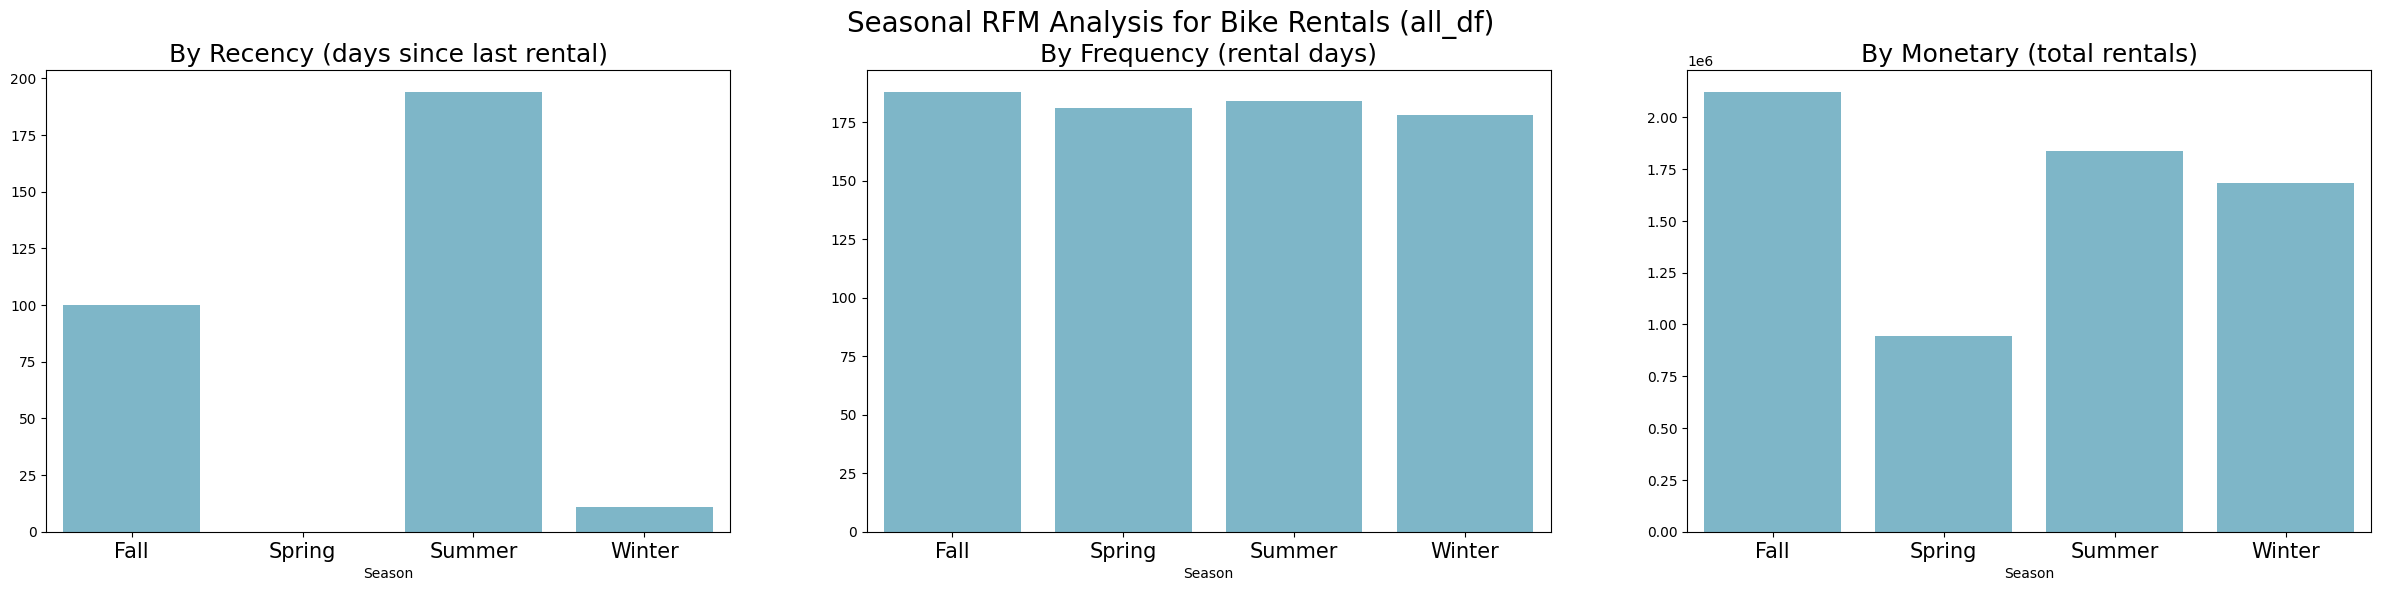

In [78]:
### RECENCY: Tanggal terakhir penyewaan per musim
recency = all_df.groupby("season", observed=False)["dteday"].max().reset_index()
recency["recency_days"] = (recency["dteday"].max() - recency["dteday"]).dt.days  # Hitung hari sejak terakhir sewa
recency = recency.drop(columns=["dteday"])

### FREQUENCY: Jumlah hari unik penyewaan per musim
frequency = all_df.groupby("season", observed=False)["dteday"].nunique().reset_index()
frequency.columns = ["season", "rental_days"]

### MONETARY: Total penyewaan sepeda per musim
monetary = all_df.groupby("season", observed=False)["cnt"].sum().reset_index()
monetary.columns = ["season", "total_rentals"]

# Gabungkan hasil RFM
rfm_df = recency.merge(frequency, on="season").merge(monetary, on="season")

# Buat visualisasi menggunakan matplotlib dan seaborn
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Recency Plot
sns.barplot(y="recency_days", x="season", hue="season", data=rfm_df.sort_values(by="recency_days", ascending=True), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Season")
ax[0].set_title("By Recency (days since last rental)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Frequency Plot
sns.barplot(y="rental_days", x="season", hue="season", data=rfm_df.sort_values(by="rental_days", ascending=False), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Season")
ax[1].set_title("By Frequency (rental days)", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Monetary Plot
sns.barplot(y="total_rentals", x="season", hue="season", data=rfm_df.sort_values(by="total_rentals", ascending=False), palette=colors, ax=ax[2], legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel("Season")
ax[2].set_title("By Monetary (total rentals)", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Seasonal RFM Analysis for Bike Rentals (all_df)", fontsize=20)
plt.show()

## Clustering Analisis

disini saya menggunakan clustering analisis untuk analisis dataset day_df dan hour_df.

**total penyewa sepeda berdasarkan musim**.

In [95]:
# Buat mapping untuk mengganti angka dengan nama musim
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Mengubah angka season menjadi nama sesuai mapping
sorted_season_usage["season"] = sorted_season_usage["season"].replace(season_mapping)

# Menampilkan hasil
print(sorted_season_usage)


   season      cnt
2    Fall  1061129
4    Fall  1061129
1  Summer   918589
6  Summer   918589
3  Winter   841613
7  Winter   841613
0  Spring   471348
5  Spring   471348


**total penyewa sepeda berdasarkan tahun**

In [101]:
# menghitung total penyewa sepeda berdasarkan tahun
total_rentals_by_year = all_df.groupby("year")["cnt"].sum().reset_index()
print(total_rentals_by_year)


   year      cnt
0  2011  2486206
1  2012  4099152
